<a href="https://colab.research.google.com/github/ai4he/Desktop_Application/blob/main/apps_google_play.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Data

In [ ]:
#Required libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
cwd = os.getcwd() #Copy current working directory

In [ ]:
#df = pd.read_csv(cwd + '/All Categories.csv',index_col=0  ) # Read csv
df = pd.read_csv('/kaggle/input/google-play-store-category-wise-top-500-apps/All Categories.csv',index_col=0  ) # Read csv

In [ ]:
df.head() # First 5 rows

,Name,Developer,Category,Size,Star Rating,Reviews,Downloads,Rated for
Rank,,,,,,,,
1,Meesho: Online Shopping App,Meesho,Shopping,15 MB,4.4,15L,10Cr+,3+
2,Shopee: Online Shopping,Shopee,Shopping,68 MB,4.1,76T,1Cr+,3+
3,Instagram,Instagram,Social,41 MB,4.3,13Cr,100Cr+,12+
4,"MX Player: Videos, OTT & Games",MX Media (formerly J2 Interactive),Video Players & Editors,36 MB,4.1,1Cr,100Cr+,3+
5,speedfiy,PRIME DIGITAL PTE. LTD.,Tools,12 MB,4.5,41T,1Cr+,3+


In [ ]:
data = df.copy() # Copy to another DataFrame

### EDA

In [ ]:
data.head()

,Name,Developer,Category,Size,Star Rating,Reviews,Downloads,Rated for
Rank,,,,,,,,
1,Meesho: Online Shopping App,Meesho,Shopping,15 MB,4.4,15L,10Cr+,3+
2,Shopee: Online Shopping,Shopee,Shopping,68 MB,4.1,76T,1Cr+,3+
3,Instagram,Instagram,Social,41 MB,4.3,13Cr,100Cr+,12+
4,"MX Player: Videos, OTT & Games",MX Media (formerly J2 Interactive),Video Players & Editors,36 MB,4.1,1Cr,100Cr+,3+
5,speedfiy,PRIME DIGITAL PTE. LTD.,Tools,12 MB,4.5,41T,1Cr+,3+


In [ ]:
data.info() # DataFrame information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 1 to 600
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         600 non-null    object 
 1   Developer    600 non-null    object 
 2   Category     600 non-null    object 
 3   Size         600 non-null    object 
 4   Star Rating  599 non-null    float64
 5   Reviews      599 non-null    object 
 6   Downloads    600 non-null    object 
 7   Rated for    600 non-null    object 
dtypes: float64(1), object(7)
memory usage: 42.2+ KB


In [ ]:
data = data[data.Reviews.notna()] # Drop NaN value

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599 entries, 1 to 600
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         599 non-null    object 
 1   Developer    599 non-null    object 
 2   Category     599 non-null    object 
 3   Size         599 non-null    object 
 4   Star Rating  599 non-null    float64
 5   Reviews      599 non-null    object 
 6   Downloads    599 non-null    object 
 7   Rated for    599 non-null    object 
dtypes: float64(1), object(7)
memory usage: 42.1+ KB


In [ ]:
data.drop('Size',axis=1, inplace=True) # Drop Size Column

In [ ]:
data.Reviews.unique() # Unique values of the column Reviews

array(['15L', '76T', '13Cr', '1Cr', '41T', '2Cr', '34L', '4L', '2L',
       '20L', '77L', '12Cr', '69L', '45L', '32L', '15Cr', '46T', '7L',
       '14L', '1L', '71L', '35L', '6L', '12L', '10L', '16L', '57L', '5T',
       '30L', '38L', '5L', '79L', '3T', '11L', '50T', '8L', '81T', '23T',
       '55T', '87T', '22T', '25T', '3L', '47L', '28L', '8Cr', '13L',
       '52T', '23L', '60L', '32T', '53L', '4T', '7T', '25L', '21L', '9L',
       '24T', '1T', '70T', '36L', '65T', '29L', '77T', '66L', '92T',
       '21T', '17L', '19L', '80T', '57T', '928', '73L', '20T', '82L',
       '27L', '8T', '62T', '18L', '2T', '30T', '35T', '95L', '75T', '87L',
       '531', '31T', '13T', '84T', '64T', '687', '18T', '68T', '71T',
       '54T', '9T', '22L', '85T', '41L', '4Cr', '39T', '15T', '36T',
       '49L', '53T', '99T', '370', '59L', '34T', '58T', '33T', '326',
       '514', '10T', '56T', '48T', '30', '24L', '68L', '27T', '94L',
       '40L', '29T', '60T', '6T', '40T', '48L', '65L', '547', '925',
       '

In [ ]:
data.Downloads.unique() # Unique values of the column Downloads

array(['10Cr+', '1Cr+', '100Cr+', '50Cr+', '5Cr+', '500Cr+', '50L+',
       '10L+', '1L+', '5L+', '1TCr+', '50T+', '10T+'], dtype=object)

In [ ]:
# Abbreviations

# T = 1000            (K)
# L = 100000 
# Cr = 10000000       (10M)
# TCr = 10000000000   (10B)

In [ ]:
data[data.Downloads.str.contains('TCr', regex=False)]   # YouTube only app with more than 10 Billion Downloads == 1TCr+

,Name,Developer,Category,Star Rating,Reviews,Downloads,Rated for
Rank,,,,,,,
332,YouTube,Google LLC,Video Players & Editors,4.1,13Cr,1TCr+,12+


### Changing abbreviations of Reviews

##### Change current abbreviations to (K(Thousand), M(Million)) and (K(Thousand), M(Million), B(Billion)) in the case of Downloads
#### Creating two columns, one with the new abbreviations and one in units.

In [ ]:
Lista_num = [] # Numbers saved as str
Lista_str = [] # Abbreviations

for value in data.Reviews:
    if value.endswith('T') == True: 
        Lista_num.append(value[0:-1])
        Lista_str.append(value[-1])
    elif value.endswith('L') == True:
        Lista_num.append(value[0:-1])
        Lista_str.append(value[-1])
    elif value.endswith('Cr') == True:
        Lista_num.append(value[0:-2])
        Lista_str.append(value[-2:])
    else:
        Lista_num.append(value)
        Lista_str.append('')

In [ ]:
Lista_str # List of Abbreviations


['L',
 'T',
 'Cr',
 'Cr',
 'T',
 'Cr',
 'L',
 'Cr',
 'Cr',
 'L',
 'L',
 'L',
 'L',
 'Cr',
 'Cr',
 'L',
 'Cr',
 'L',
 'L',
 'L',
 'L',
 'Cr',
 'Cr',
 'Cr',
 'T',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'T',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'T',
 'L',
 'T',
 'Cr',
 'L',
 'L',
 'T',
 'L',
 'T',
 'T',
 'T',
 'L',
 'T',
 'L',
 'T',
 'Cr',
 'T',
 'L',
 'T',
 'L',
 'L',
 'Cr',
 'L',
 'L',
 'L',
 'L',
 'T',
 'L',
 'T',
 'Cr',
 'L',
 'L',
 'T',
 'L',
 'Cr',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'T',
 'Cr',
 'T',
 'L',
 'L',
 'L',
 'L',
 'L',
 'T',
 'T',
 'T',
 'L',
 'L',
 'T',
 'L',
 'L',
 'L',
 'L',
 'T',
 'L',
 'L',
 'T',
 'L',
 'T',
 'T',
 'L',
 'L',
 'L',
 'Cr',
 'T',
 'L',
 'T',
 'T',
 'L',
 'L',
 'L',
 'L',
 'L',
 'T',
 'L',
 'T',
 'L',
 'T',
 'Cr',
 '',
 'Cr',
 'L',
 'L',
 'T',
 'L',
 'L',
 'L',
 'T',
 'L',
 'L',
 'T',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'T',
 'T',
 'T',
 'L',
 'T',
 'T',
 'L',
 'L',
 'L',
 'T',
 'L',
 'T',
 'T',
 'L',
 'L',
 'L',
 'L',
 'T

In [ ]:
np.unique(np.array(Lista_str)) # Unique values of the list

array(['', 'Cr', 'L', 'T'], dtype='<U2')

In [ ]:
# Converting abbreviations to units

# T = 1000     (K)
# L = 100000 
# Cr = 10000000       (10M)

Lista_str_to_num = []

for value in Lista_str:
    if value == 'T': 
        Lista_str_to_num.append(1000)
    elif value == 'L':
        Lista_str_to_num.append(100000)
    elif value == 'Cr':
        Lista_str_to_num.append(10000000)
    else:
        Lista_str_to_num.append(1)


In [ ]:
Lista_str_to_num # List of numbers converted from the abb

[100000,
 1000,
 10000000,
 10000000,
 1000,
 10000000,
 100000,
 10000000,
 10000000,
 100000,
 100000,
 100000,
 100000,
 10000000,
 10000000,
 100000,
 10000000,
 100000,
 100000,
 100000,
 100000,
 10000000,
 10000000,
 10000000,
 1000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 1000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 1000,
 100000,
 1000,
 10000000,
 100000,
 100000,
 1000,
 100000,
 1000,
 1000,
 1000,
 100000,
 1000,
 100000,
 1000,
 10000000,
 1000,
 100000,
 1000,
 100000,
 100000,
 10000000,
 100000,
 100000,
 100000,
 100000,
 1000,
 100000,
 1000,
 10000000,
 100000,
 100000,
 1000,
 100000,
 10000000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 1000,
 10000000,
 1000,
 100000,
 100000,
 100000,
 100000,
 100000,
 1000,
 1000,
 1000,
 100000,
 100000,
 1000,
 100000,
 100000,
 100000,
 100000,
 1000,
 100000,
 100000,
 1000,
 100000,
 1000,
 1000,
 100000,
 100000,
 100000,
 10000000,
 

In [ ]:
# Converting numbers saved as str to integers
int_output = map(int, Lista_num) #Maps each string to an int.
integer_list = list(int_output) #Converts mapped output to a list of ints.
print(integer_list[0:20])

[15, 76, 13, 1, 41, 2, 34, 2, 1, 4, 2, 20, 77, 1, 1, 2, 12, 69, 2, 45]


In [ ]:
Reviews_unit = np.array(Lista_str_to_num) * np.array(integer_list)
Reviews_unit      # Reviews in units

array([  1500000,     76000, 130000000,  10000000,     41000,  20000000,
         3400000,  20000000,  10000000,    400000,    200000,   2000000,
         7700000,  10000000,  10000000,    200000, 120000000,   6900000,
          200000,   4500000,   3200000,  10000000,  10000000, 150000000,
           46000,    700000,   1400000,    100000,   7100000,   3500000,
          600000,   1200000,   1000000,   1600000,   5700000,      5000,
         3000000,   3800000,    200000,   3800000,    500000,    100000,
         7900000,      3000,   1100000,     50000,  20000000,    200000,
          800000,     81000,    400000,     23000,     55000,     87000,
          700000,     22000,   1400000,      5000,  10000000,     25000,
          300000,     76000,   4700000,   2800000,  80000000,    800000,
          100000,   3500000,   1300000,      3000,    300000,     52000,
        10000000,   2300000,   6000000,     32000,   5300000,  20000000,
          300000,    400000,    300000,    100000, 

In [ ]:
# Creating a List of Reviews with abbreviations (K(Thousand), M(Million))
Reviews = []

for v in Reviews_unit:
    if v/1000000 >= 1:
        Reviews.append(f'{round(v/1000000,1)}M')
    elif v/1000 >= 1: 
        Reviews.append(f'{int(v/1000)}K')
    else:
        Reviews.append(f'{v}') 

In [ ]:
Reviews        # Reviews with different abbreviattions 

['1.5M',
 '76K',
 '130.0M',
 '10.0M',
 '41K',
 '20.0M',
 '3.4M',
 '20.0M',
 '10.0M',
 '400K',
 '200K',
 '2.0M',
 '7.7M',
 '10.0M',
 '10.0M',
 '200K',
 '120.0M',
 '6.9M',
 '200K',
 '4.5M',
 '3.2M',
 '10.0M',
 '10.0M',
 '150.0M',
 '46K',
 '700K',
 '1.4M',
 '100K',
 '7.1M',
 '3.5M',
 '600K',
 '1.2M',
 '1.0M',
 '1.6M',
 '5.7M',
 '5K',
 '3.0M',
 '3.8M',
 '200K',
 '3.8M',
 '500K',
 '100K',
 '7.9M',
 '3K',
 '1.1M',
 '50K',
 '20.0M',
 '200K',
 '800K',
 '81K',
 '400K',
 '23K',
 '55K',
 '87K',
 '700K',
 '22K',
 '1.4M',
 '5K',
 '10.0M',
 '25K',
 '300K',
 '76K',
 '4.7M',
 '2.8M',
 '80.0M',
 '800K',
 '100K',
 '3.5M',
 '1.3M',
 '3K',
 '300K',
 '52K',
 '10.0M',
 '2.3M',
 '6.0M',
 '32K',
 '5.3M',
 '20.0M',
 '300K',
 '400K',
 '300K',
 '100K',
 '100K',
 '1.4M',
 '4K',
 '10.0M',
 '7K',
 '1.6M',
 '2.5M',
 '2.1M',
 '900K',
 '200K',
 '24K',
 '5K',
 '1K',
 '200K',
 '200K',
 '70K',
 '2.1M',
 '3.6M',
 '300K',
 '4.5M',
 '65K',
 '200K',
 '800K',
 '41K',
 '2.9M',
 '77K',
 '3K',
 '6.6M',
 '200K',
 '100K',
 '10.0M'

In [ ]:
np.unique(np.array(Reviews))

array(['1.0M', '1.1M', '1.2M', '1.3M', '1.4M', '1.5M', '1.6M', '1.7M',
       '1.8M', '1.9M', '10.0M', '100K', '10K', '11K', '120.0M', '122',
       '130.0M', '13K', '14K', '150.0M', '152', '15K', '16K', '187',
       '188', '18K', '19K', '1K', '2.0M', '2.1M', '2.2M', '2.3M', '2.4M',
       '2.5M', '2.7M', '2.8M', '2.9M', '20.0M', '200K', '20K', '21K',
       '22K', '236', '23K', '24K', '25K', '26K', '27K', '29K', '2K',
       '3.0M', '3.2M', '3.3M', '3.4M', '3.5M', '3.6M', '3.8M', '3.9M',
       '30', '300K', '30K', '31K', '326', '32K', '332', '33K', '34K',
       '35K', '361', '36K', '370', '37K', '38K', '39K', '3K', '4.0M',
       '4.1M', '4.5M', '4.7M', '4.8M', '4.9M', '40.0M', '400K', '40K',
       '41K', '420', '424', '430', '467', '46K', '487', '48K', '4K',
       '5.0M', '5.3M', '5.7M', '5.9M', '500K', '50K', '51', '514', '519',
       '51K', '529', '52K', '531', '53K', '547', '54K', '55K', '56K',
       '57K', '58K', '5K', '6.0M', '6.5M', '6.6M', '6.8M', '6.9M', '600K',
      

In [ ]:
Reviews_Abb = np.array(Reviews)  # Reviews with abbreviations saved as a numpy array 

### Changing abbreviations of Downloads

In [ ]:
# Same process of changing the abbreviations with the column of Downloads
data.Downloads.unique()


array(['10Cr+', '1Cr+', '100Cr+', '50Cr+', '5Cr+', '500Cr+', '50L+',
       '10L+', '1L+', '5L+', '1TCr+', '50T+', '10T+'], dtype=object)

In [ ]:
Lista_num_downloads = []
Lista_str_downloads = []

for value in data.Downloads:
    if value.endswith('T+') == True: 
        Lista_num_downloads.append(value[0:-2])
        Lista_str_downloads.append(value[-2:])
    elif value.endswith('L+') == True:
        Lista_num_downloads.append(value[0:-2])
        Lista_str_downloads.append(value[-2:])
    elif value.endswith('TCr+') == True:
        Lista_num_downloads.append(value[0:-4])
        Lista_str_downloads.append(value[-4:])
    else:  #Cr+
        Lista_num_downloads.append(value[0:-3])
        Lista_str_downloads.append(value[-3:])
  

In [ ]:
np.unique(np.array(Lista_str_downloads))

array(['Cr+', 'L+', 'T+', 'TCr+'], dtype='<U4')

In [ ]:
# T = 1000            (K)
# L = 100000 
# Cr = 10000000       (10M)
# TCr = 10000000000   10.000.000.000  (10B)

Lista_str_to_num_downloads = []

for value in Lista_str_downloads:
    if value == 'T+': 
        Lista_str_to_num_downloads.append(1000)
    elif value == 'L+':
        Lista_str_to_num_downloads.append(100000)
    elif value == 'TCr+':
        Lista_str_to_num_downloads.append(10000000000)
    else:   #Cr+
        Lista_str_to_num_downloads.append(10000000)
   

In [ ]:
np.unique(np.array(Lista_str_to_num_downloads))


array([       1000,      100000,    10000000, 10000000000])

In [ ]:
int_output = map(int, Lista_num_downloads) #Maps each string to an int.
int_list = list(int_output) #Converts mapped output to a list of ints.
print(int_list[0:20])

[10, 1, 100, 100, 1, 100, 50, 10, 100, 5, 5, 10, 10, 50, 10, 1, 500, 50, 5, 10]


In [ ]:
Downloads_unit = np.array(Lista_str_to_num_downloads) * np.array(int_list)
Downloads_unit     # array of Downloads in units

array([  100000000,    10000000,  1000000000,  1000000000,    10000000,
        1000000000,   500000000,   100000000,  1000000000,    50000000,
          50000000,   100000000,   100000000,   500000000,   100000000,
          10000000,  5000000000,   500000000,    50000000,   100000000,
         100000000,   100000000,   500000000,  5000000000,    10000000,
          10000000,  1000000000,    10000000,   500000000,   100000000,
         100000000,   100000000,    10000000,   100000000,   100000000,
           5000000,   100000000,   100000000,    10000000,   100000000,
         100000000,    10000000,   100000000,     1000000,   100000000,
          10000000,  1000000000,    50000000,   100000000,    10000000,
         100000000,    50000000,    10000000,    10000000,   100000000,
           5000000,   100000000,     1000000,   100000000,     5000000,
          10000000,    10000000,   100000000,   100000000,  5000000000,
         100000000,    10000000,   100000000,    50000000,     5

In [ ]:
Downloads = []
 
for v in Downloads_unit:
    if v/1000000000 >= 1:
        Downloads.append(f'{int(v/1000000000)}B+')
    elif v/1000000 >= 1:
        Downloads.append(f'{int(v/1000000)}M+')
    else: 
        Downloads.append(f'{int(v/1000)}K+')  

Downloads        

['100M+',
 '10M+',
 '1B+',
 '1B+',
 '10M+',
 '1B+',
 '500M+',
 '100M+',
 '1B+',
 '50M+',
 '50M+',
 '100M+',
 '100M+',
 '500M+',
 '100M+',
 '10M+',
 '5B+',
 '500M+',
 '50M+',
 '100M+',
 '100M+',
 '100M+',
 '500M+',
 '5B+',
 '10M+',
 '10M+',
 '1B+',
 '10M+',
 '500M+',
 '100M+',
 '100M+',
 '100M+',
 '10M+',
 '100M+',
 '100M+',
 '5M+',
 '100M+',
 '100M+',
 '10M+',
 '100M+',
 '100M+',
 '10M+',
 '100M+',
 '1M+',
 '100M+',
 '10M+',
 '1B+',
 '50M+',
 '100M+',
 '10M+',
 '100M+',
 '50M+',
 '10M+',
 '10M+',
 '100M+',
 '5M+',
 '100M+',
 '1M+',
 '100M+',
 '5M+',
 '10M+',
 '10M+',
 '100M+',
 '100M+',
 '5B+',
 '100M+',
 '10M+',
 '100M+',
 '50M+',
 '5M+',
 '10M+',
 '10M+',
 '500M+',
 '100M+',
 '100M+',
 '5M+',
 '1B+',
 '1B+',
 '50M+',
 '50M+',
 '50M+',
 '10M+',
 '10M+',
 '100M+',
 '1M+',
 '1B+',
 '1M+',
 '100M+',
 '50M+',
 '100M+',
 '50M+',
 '10M+',
 '10M+',
 '10M+',
 '1M+',
 '10M+',
 '10M+',
 '10M+',
 '100M+',
 '100M+',
 '10M+',
 '100M+',
 '10M+',
 '10M+',
 '50M+',
 '10M+',
 '100M+',
 '10M+',
 '5M+',

In [ ]:
np.unique(np.array(Downloads)) # Unique Download values


array(['100K+', '100M+', '10B+', '10K+', '10M+', '1B+', '1M+', '500K+',
       '500M+', '50K+', '50M+', '5B+', '5M+'], dtype='<U5')

In [ ]:
Downloads_Abb = np.array(Downloads)  # array of Downloads with new abbreviattions 

### Adding the new columns

In [ ]:
data.head()

,Name,Developer,Category,Star Rating,Reviews,Downloads,Rated for
Rank,,,,,,,
1,Meesho: Online Shopping App,Meesho,Shopping,4.4,15L,10Cr+,3+
2,Shopee: Online Shopping,Shopee,Shopping,4.1,76T,1Cr+,3+
3,Instagram,Instagram,Social,4.3,13Cr,100Cr+,12+
4,"MX Player: Videos, OTT & Games",MX Media (formerly J2 Interactive),Video Players & Editors,4.1,1Cr,100Cr+,3+
5,speedfiy,PRIME DIGITAL PTE. LTD.,Tools,4.5,41T,1Cr+,3+


In [ ]:
# Adding Review Columns
data['Reviews_Abb'] = Reviews_Abb  
data['Reviews_unit'] = Reviews_unit

In [ ]:
# Adding Download Columns
data['Downloads_Abb'] = Downloads_Abb  
data['Downloads_unit'] = Downloads_unit

In [ ]:
data.head()

,Name,Developer,Category,Star Rating,Reviews,Downloads,Rated for,Reviews_Abb,Reviews_unit,Downloads_Abb,Downloads_unit
Rank,,,,,,,,,,,
1,Meesho: Online Shopping App,Meesho,Shopping,4.4,15L,10Cr+,3+,1.5M,1500000,100M+,100000000
2,Shopee: Online Shopping,Shopee,Shopping,4.1,76T,1Cr+,3+,76K,76000,10M+,10000000
3,Instagram,Instagram,Social,4.3,13Cr,100Cr+,12+,130.0M,130000000,1B+,1000000000
4,"MX Player: Videos, OTT & Games",MX Media (formerly J2 Interactive),Video Players & Editors,4.1,1Cr,100Cr+,3+,10.0M,10000000,1B+,1000000000
5,speedfiy,PRIME DIGITAL PTE. LTD.,Tools,4.5,41T,1Cr+,3+,41K,41000,10M+,10000000


### Creating new Dataframe with complete data

In [ ]:
data.columns

Index(['Name', 'Developer', 'Category', 'Star Rating', 'Reviews', 'Downloads',
       'Rated for', 'Reviews_Abb', 'Reviews_unit', 'Downloads_Abb',
       'Downloads_unit'],
      dtype='object')

In [ ]:
# New order of columns
columns = ['Name', 'Developer', 'Category', 'Star Rating', 'Reviews_Abb', 'Reviews_unit', 'Downloads_Abb',
       'Downloads_unit','Rated for']

In [ ]:
all_data = data[columns] # Creating new df called all_data

In [ ]:
all_data.rename(columns={'Star Rating':'Star_Rating','Rated for':'Rated_for'}, inplace=True) #rename columns with blank spaces

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
all_data.head()

,Name,Developer,Category,Star_Rating,Reviews_Abb,Reviews_unit,Downloads_Abb,Downloads_unit,Rated_for
Rank,,,,,,,,,
1,Meesho: Online Shopping App,Meesho,Shopping,4.4,1.5M,1500000,100M+,100000000,3+
2,Shopee: Online Shopping,Shopee,Shopping,4.1,76K,76000,10M+,10000000,3+
3,Instagram,Instagram,Social,4.3,130.0M,130000000,1B+,1000000000,12+
4,"MX Player: Videos, OTT & Games",MX Media (formerly J2 Interactive),Video Players & Editors,4.1,10.0M,10000000,1B+,1000000000,3+
5,speedfiy,PRIME DIGITAL PTE. LTD.,Tools,4.5,41K,41000,10M+,10000000,3+


## Visualizations

### Rating Distribution

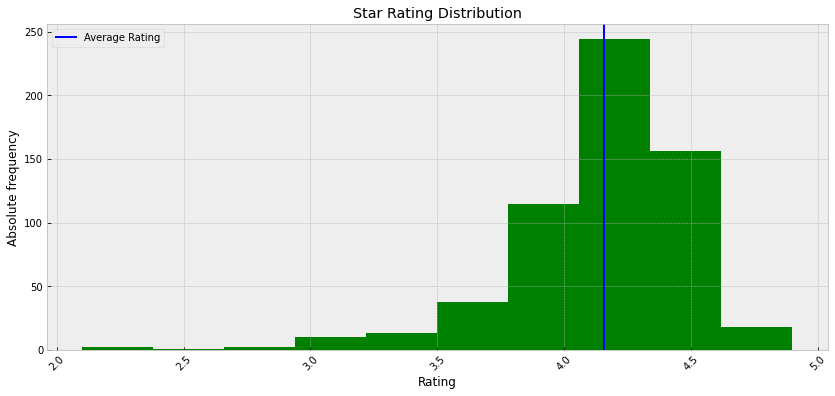

In [ ]:
plt.style.use('bmh')
plt.figure(figsize=(14,6))

media_rating =all_data.Star_Rating.mean() # 

plt.axvline(x = media_rating , color="b", ls = '-',label="Average Rating")

plt.hist(all_data.Star_Rating, color='g')

plt.xticks(rotation=45)

plt.title("Star Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Absolute frequency")

plt.legend(loc = "upper left")


plt.show()

### Top 10 Categories by number of apps in the ranking

In [ ]:
category_count = all_data.Category.value_counts()[:10]
category_count

Tools                      103
Finance                     70
Entertainment               50
Social                      42
Shopping                    40
Video Players & Editors     40
Productivity                39
Photography                 28
Communication               28
Business                    23
Name: Category, dtype: int64

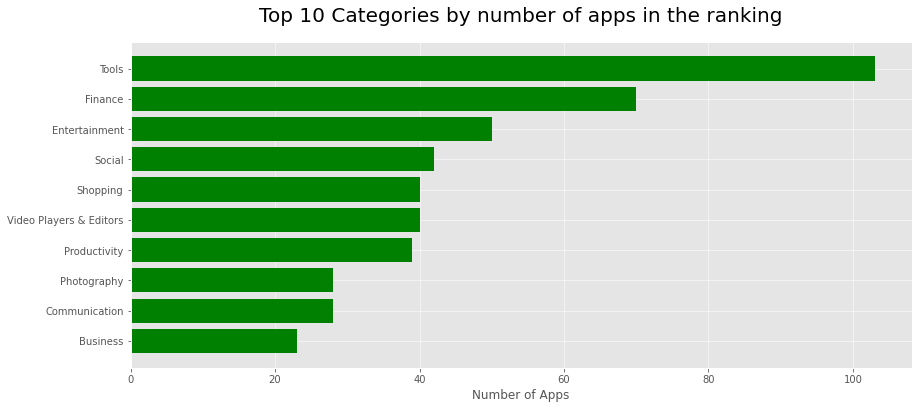

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(14,6))

plt.barh(category_count.index,category_count , color='g')
plt.title("Top 10 Categories by number of apps in the ranking",{'fontsize':20},pad=20)
plt.xlabel("Number of Apps")
plt.gca().invert_yaxis()

plt.show()

### Correlation between Star Rating and Number of Downloads?

In [ ]:
fig = px.scatter(all_data, x="Star_Rating", y="Downloads_unit")
fig.show()

In [ ]:
df_no_outliers = all_data[all_data.Downloads_unit <5000000000]   # Drop Outliers
fig = px.scatter(df_no_outliers, x="Star_Rating", y="Downloads_unit")  
fig.show()

In [ ]:
#    There is no correlation     Correlation ~ 0  
# Numpy
print(np.corrcoef(all_data.Star_Rating ,all_data.Downloads_unit)[0,1])
# Pandas
print(all_data.Star_Rating.corr(all_data.Downloads_unit)  )

0.01673922867693958
0.01673922867693958


### Apps with most downloads 

In [ ]:
# TOP 20 Apps with most downloads
all_data.sort_values('Downloads_unit',ascending=False).iloc[0:20,np.r_[0:2,3,6]]

,Name,Developer,Star_Rating,Downloads_Abb
Rank,,,,
332,YouTube,Google LLC,4.1,10B+
24,WhatsApp Messenger,WhatsApp LLC,4.1,5B+
224,Google Photos,Google LLC,4.4,5B+
398,Google Drive,Google LLC,4.2,5B+
17,Facebook,"Meta Platforms, Inc.",4.0,5B+
65,Messenger,"Meta Platforms, Inc.",4.2,5B+
269,Google Sheets,Google LLC,4.3,1B+
428,Google Docs,Google LLC,4.3,1B+
27,ShareMe: File sharing,Xiaomi Inc.,4.4,1B+


### Top 10 Developers by number of Apps in Ranking

In [ ]:
apps_by_devs = all_data.Developer.value_counts()[:10]  # Number of apps in the ranking by Developers
apps_by_devs

Google LLC                            27
InShot Inc.                            9
Amazon Mobile LLC                      6
Microsoft Corporation                  5
Meta Platforms, Inc.                   4
SNOW, Inc.                             4
MX Media (formerly J2 Interactive)     4
BYJU'S                                 3
Appyhigh Technology                    3
ShareChat                              3
Name: Developer, dtype: int64

In [ ]:
apps_by_devs.index 

Index(['Google LLC', 'InShot Inc.', 'Amazon Mobile LLC',
       'Microsoft Corporation', 'Meta Platforms, Inc.', 'SNOW, Inc.',
       'MX Media (formerly J2 Interactive)', 'BYJU'S', 'Appyhigh Technology',
       'ShareChat'],
      dtype='object')

In [ ]:
fig = px.bar(apps_by_devs, y=apps_by_devs.index , x=apps_by_devs, text=apps_by_devs, orientation='h')

fig.update_traces(textfont_size=12, marker_color='green',textangle=0, textposition="inside", cliponaxis=False)

fig.update_layout(
    title={
        'text':"Top 10 Developers by number of Apps in Ranking",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'} , 
    yaxis_title = None,
    xaxis_title="Number of Apps",
    yaxis={'categoryorder':'total ascending'},
    font=dict(
        family="Arial, monospace",
        size=14,
        color="Green",
    )
)

fig.show()

### Top 10 Developers by number of Downloads

In [ ]:
# Developers with the most Downloads
Downloads_devs_10 = all_data.groupby(['Developer']).sum()['Downloads_unit'].sort_values(ascending=False)[0:10]
Downloads_devs_10

Developer
Google LLC                            30080000000
Meta Platforms, Inc.                  11500000000
WhatsApp LLC                           5500000000
Microsoft Corporation                  3600000000
MX Media (formerly J2 Interactive)     1120000000
Instagram                              1100000000
Xiaomi Inc.                            1055000000
Spotify AB                             1000000000
Telegram FZ-LLC                        1000000000
Twitter, Inc.                          1000000000
Name: Downloads_unit, dtype: int64

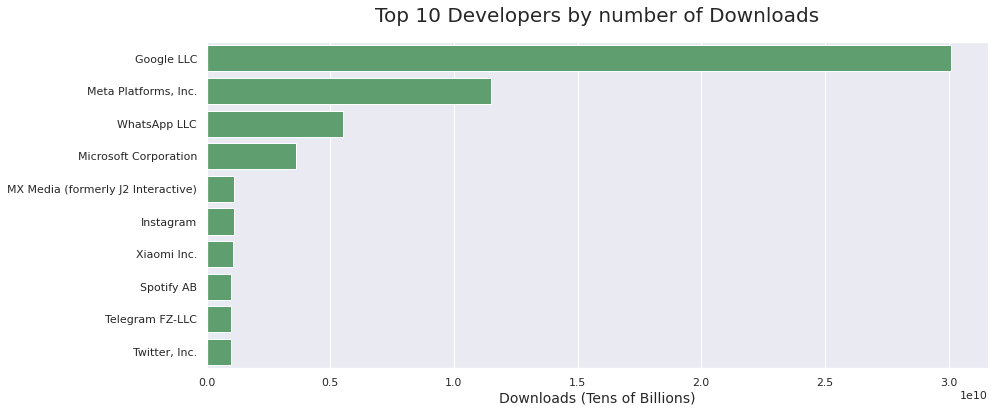

In [ ]:
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize=(14,6))

ax = sns.barplot(x=Downloads_devs_10, y=Downloads_devs_10.index, ax=ax, color='g', errwidth=0)

ax.set_title('Top 10 Developers by number of Downloads', {'fontsize':20},pad=20)
ax.set_xlabel("Downloads (Tens of Billions)",{'fontsize':14})
ax.set(ylabel=None)

plt.show()
